In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras import optimizers
from sklearn.datasets import fetch_openml
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from keras.callbacks import History
import time
import warnings
warnings.filterwarnings("ignore")

### Definizione di funzioni utili per l'inizializzazione e l'allenamento del modello + plot dei risultati ottenuti

In [20]:
def build_model():
  model = Sequential()
  model.add(Dense(512, activation='relu', input_dim=X_train2.shape[1]))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model

In [21]:
def plot_loss(optimizer, loss, accuracy):
    plt.figure(figsize=(9,7))
    plt.subplot(2,1,1)
    plt.title(optimizer)
    plt.xlabel("Epoca")
    plt.ylabel("Log-Loss")
    plt.plot(loss)
    plt.figure(figsize=(9,7))
    plt.subplot(2,1,2)
    plt.title(optimizer)
    plt.xlabel("Epoca")
    plt.ylabel("accuracy")
    plt.plot(accuracy)

In [22]:
def train_and_time(model, optimizer,n_batch, epochs):

    history = History()

    start_at = time.time()
    model.fit(X_train2, y_train_dummy2, epochs=epochs, batch_size=n_batch, callbacks=[history], verbose=0)
    train_time = time.time() - start_at

    metrics = model.evaluate(X_train2, y_train_dummy2, verbose=0)

    print("Tempo di addestramento: %d minuti e %d secondi" % (train_time/60, train_time%60))
    print("Accuracy = %.4f - Loss = %.4f" % (metrics[1], metrics[0]))

    plot_loss(optimizer, history.history['loss'], history.history['accuracy'])

    return model

Nel seguente notebook, verranno addestrati dei modelli di ANN sui dataset **MNIST** e **fashion MNIST**.
Per il MNIST il modello è stato addestrato sulle immagini tramite la vettorizzazione dei pixel in numeri che ne specificano l'intensità del colore, che indicano numeri, facendo dunque categorizzare al modello il numero corretto in base all'immagine uscita.
 per il fashion MNIST i modelli sono stati allenati sui dati immagini tramite la vettorizzazione dei pixel in numeri che ne specificano l'intensità del colore e categorizzare bene le seguenti immagini nella giusta classe di appartenenza (di abbigliamento). I modelli sono stati testati su tre diversi criteri di ottimizzazione basati sulla **discesa lungo il gradiente**

# MNIST

Vogliamo andare a creare un modello di ANN che riesca a categorizzare correttamente il dataset MNIST, un dataset contenente immagini di numeri che vanno da 0 a 9. La seguente categorizzazione sarà possibile attraverso un analisi preliminare del dataset, che contiene qualche accortezza in più di quelle viste fino ad ora proprio per la presenza di immagini (scematizzate come numeri).

In [ ]:
X_mnist, Y_mnist = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas")       # Leggo e assegno il dataset alle variabili X_mnist e Y_mnist
Y_mnist = Y_mnist.astype(int)      # Trasformo Y_mnist in un intero
X_mnist = X_mnist/255.             # Normalizzo X_mnist

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_mnist, Y_mnist)     # Splitto i dati in train e test ---> 80%/20%

In [ ]:
# Cambio la dimensionalità dei target di train e test, cambiando il numero di colonne, da 1 al numero di categorie (10), in maniera tale che la i-esima componente del target normale, che da un certo valore, faccia ricadere il valore 1 nella corrispondente componente della nuova variabile target, nella posizione del valore del target originale
y_train_dummy = to_categorical(y_train, 10)
y_test_dummy = to_categorical(y_test, 10)

In [ ]:
print(y_train[0])             # ha valore target = 5 (componente 0)
print(y_train_dummy[0])       # ha valore 1 nella quinta componente dell'array (sempre per la componente 0 del target)

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
model = Sequential()
model.add(Dense(512, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train_dummy, epochs=20)

Epoch 1/20
1641/1641 [==============================] - 12s 7ms/step - loss: 0.5821 - accuracy: 0.8514
Epoch 2/20
1641/1641 [==============================] - 11s 7ms/step - loss: 0.2502 - accuracy: 0.9283
Epoch 3/20
1641/1641 [==============================] - 10s 6ms/step - loss: 0.1964 - accuracy: 0.9431
Epoch 4/20
1641/1641 [==============================] - 12s 7ms/step - loss: 0.1611 - accuracy: 0.9533
Epoch 5/20
1641/1641 [==============================] - 11s 7ms/step - loss: 0.1361 - accuracy: 0.9610
Epoch 6/20
1641/1641 [==============================] - 12s 7ms/step - loss: 0.1172 - accuracy: 0.9662
Epoch 7/20
1641/1641 [==============================] - 11s 7ms/step - loss: 0.1027 - accuracy: 0.9703
Epoch 8/20
1641/1641 [==============================] - 11s 7ms/step - loss: 0.0903 - accuracy: 0.9743
Epoch 9/20
1641/1641 [==============================] - 10s 6ms/step - loss: 0.0790 - accuracy: 0.9771
Epoch 10/20
1641/1641 [==============================] - 11s 7ms/step - l

In [ ]:
loss, acc = model.evaluate(X_test, y_test_dummy)

547/547 [==============================] - 3s 5ms/step - loss: 0.0772 - accuracy: 0.9764


547/547 [==============================] - 2s 3ms/step
numero 3 classificato come 5


<Figure size 400x400 with 0 Axes>

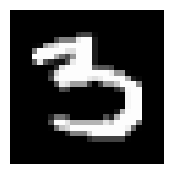

numero 7 classificato come 1


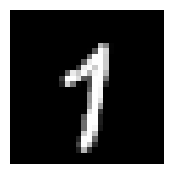

numero 8 classificato come 3


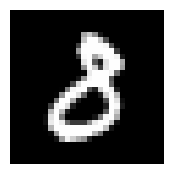

numero 6 classificato come 4


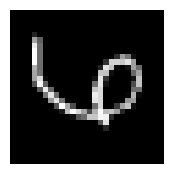

numero 4 classificato come 9


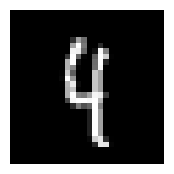

numero 2 classificato come 8


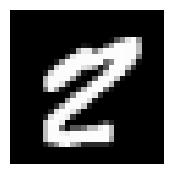

numero 3 classificato come 9


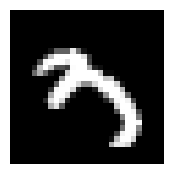

numero 0 classificato come 6


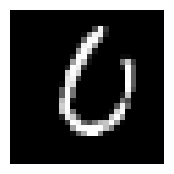

numero 3 classificato come 5


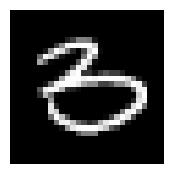

numero 8 classificato come 5


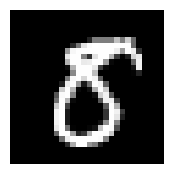

numero 8 classificato come 5


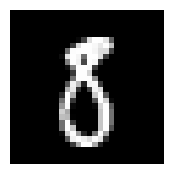

numero 1 classificato come 3


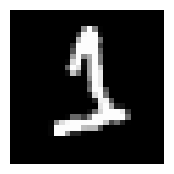

numero 2 classificato come 7


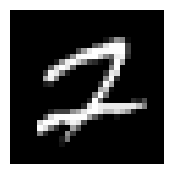

numero 6 classificato come 5


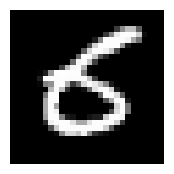

numero 8 classificato come 6


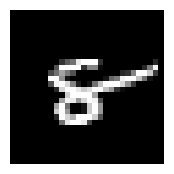

numero 3 classificato come 8


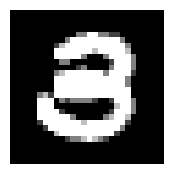

numero 7 classificato come 1


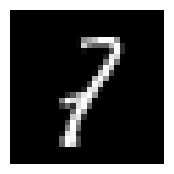

numero 7 classificato come 9


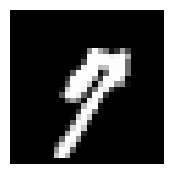

numero 7 classificato come 9


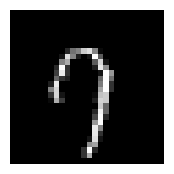

numero 6 classificato come 2


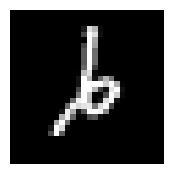

numero 5 classificato come 0


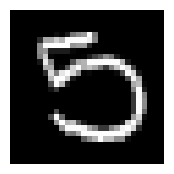

numero 2 classificato come 1


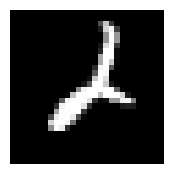

numero 4 classificato come 1


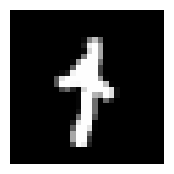

numero 8 classificato come 4


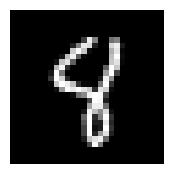

numero 7 classificato come 1


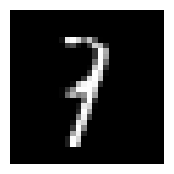

numero 3 classificato come 7


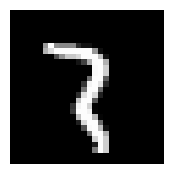

numero 8 classificato come 1


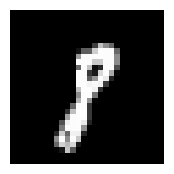

numero 1 classificato come 2


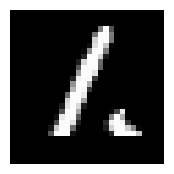

numero 3 classificato come 5


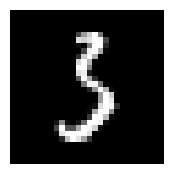

numero 4 classificato come 9


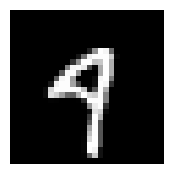

numero 8 classificato come 5


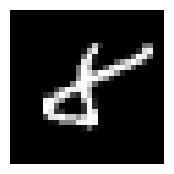

numero 9 classificato come 5


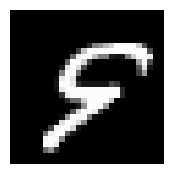

numero 3 classificato come 8


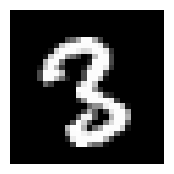

numero 2 classificato come 3


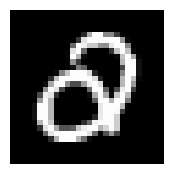

numero 4 classificato come 9


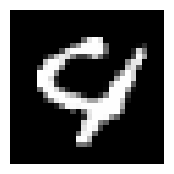

numero 2 classificato come 1


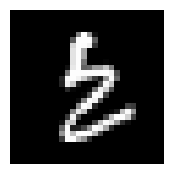

numero 8 classificato come 5


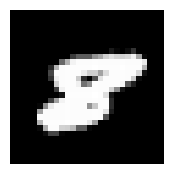

numero 8 classificato come 6


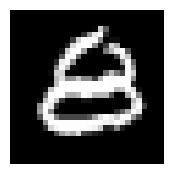

numero 0 classificato come 1


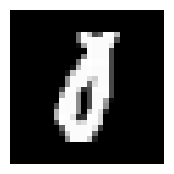

numero 6 classificato come 0


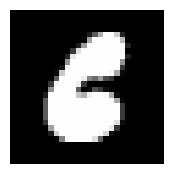

numero 2 classificato come 7


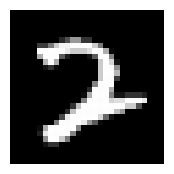

numero 2 classificato come 8


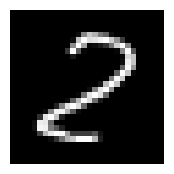

numero 5 classificato come 4


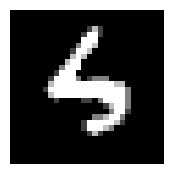

numero 0 classificato come 8


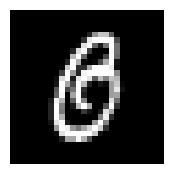

numero 9 classificato come 8


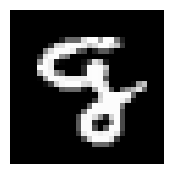

numero 7 classificato come 1


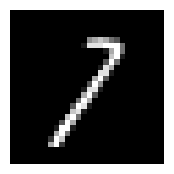

numero 3 classificato come 2


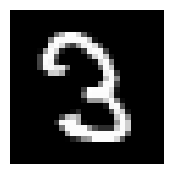

numero 5 classificato come 8


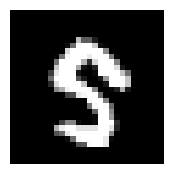

numero 5 classificato come 3


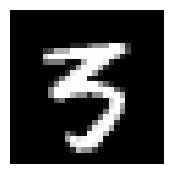

numero 2 classificato come 7


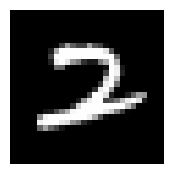

numero 5 classificato come 9


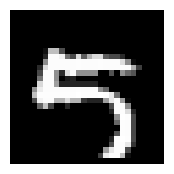

numero 4 classificato come 9


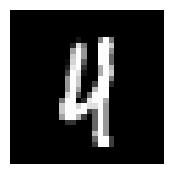

numero 7 classificato come 9


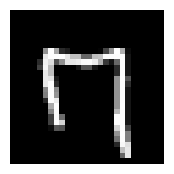

numero 9 classificato come 0


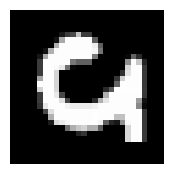

numero 8 classificato come 1


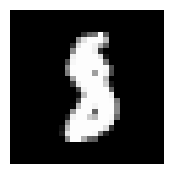

numero 0 classificato come 5


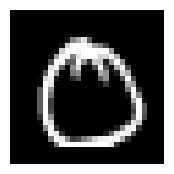

numero 5 classificato come 2


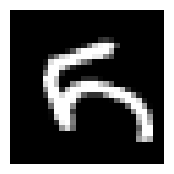

numero 3 classificato come 2


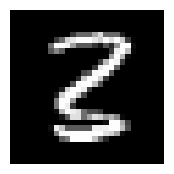

numero 5 classificato come 3


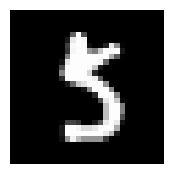

numero 7 classificato come 2


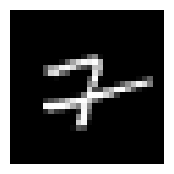

numero 7 classificato come 9


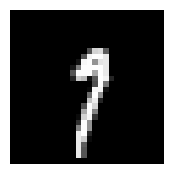

numero 3 classificato come 2


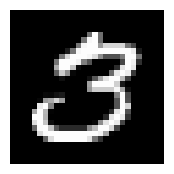

numero 1 classificato come 3


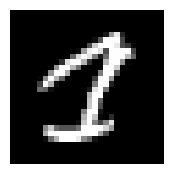

numero 7 classificato come 9


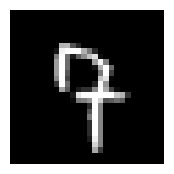

numero 2 classificato come 7


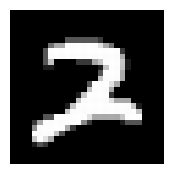

numero 6 classificato come 0


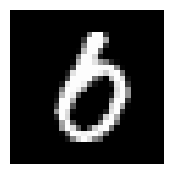

numero 6 classificato come 4


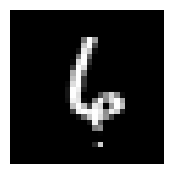

numero 1 classificato come 2


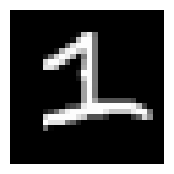

numero 4 classificato come 6


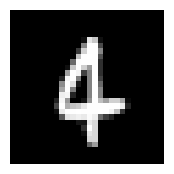

numero 8 classificato come 1


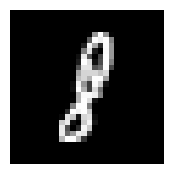

numero 9 classificato come 4


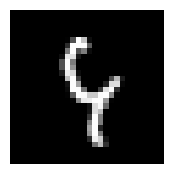

numero 6 classificato come 1


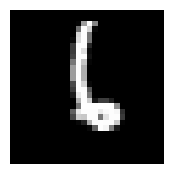

numero 3 classificato come 5


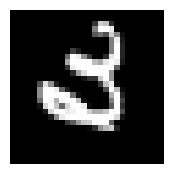

numero 3 classificato come 9


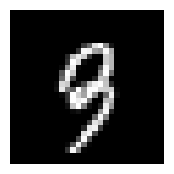

numero 4 classificato come 9


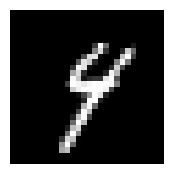

numero 8 classificato come 3


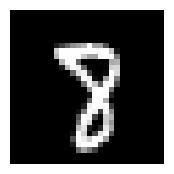

numero 5 classificato come 7


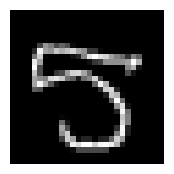

numero 5 classificato come 9


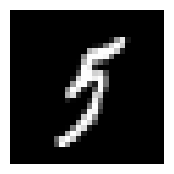

numero 9 classificato come 4


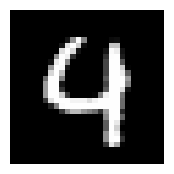

numero 6 classificato come 0


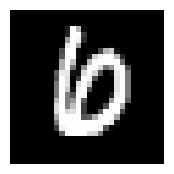

numero 7 classificato come 9


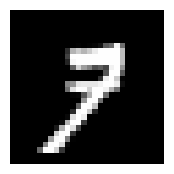

numero 4 classificato come 7


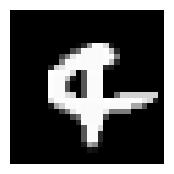

numero 7 classificato come 5


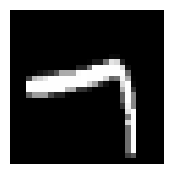

numero 8 classificato come 6


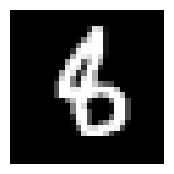

numero 3 classificato come 7


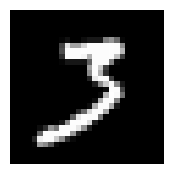

numero 7 classificato come 1


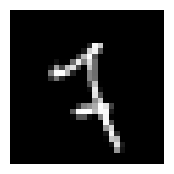

numero 4 classificato come 1


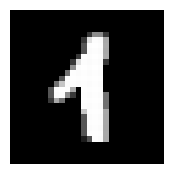

numero 2 classificato come 6


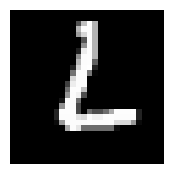

numero 2 classificato come 9


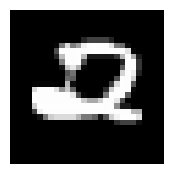

numero 8 classificato come 3


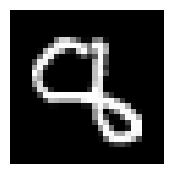

numero 9 classificato come 7


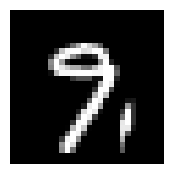

numero 9 classificato come 7


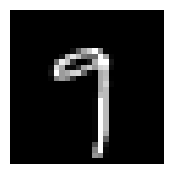

numero 0 classificato come 7


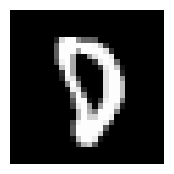

numero 9 classificato come 4


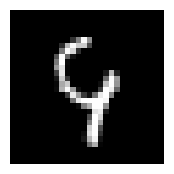

numero 4 classificato come 9


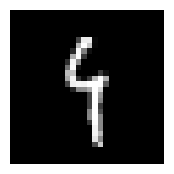

numero 8 classificato come 3


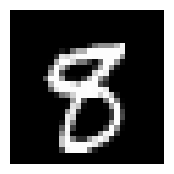

numero 8 classificato come 3


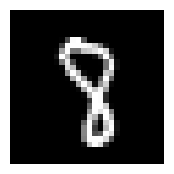

numero 0 classificato come 9


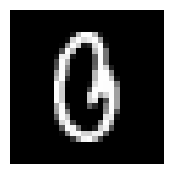

numero 5 classificato come 3


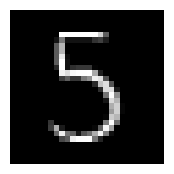

numero 3 classificato come 2


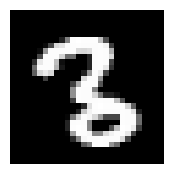

numero 2 classificato come 7


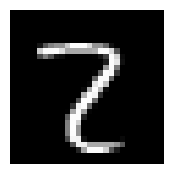

numero 4 classificato come 7


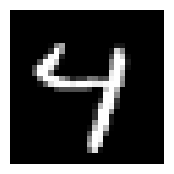

numero 8 classificato come 5


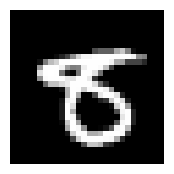

numero 9 classificato come 7


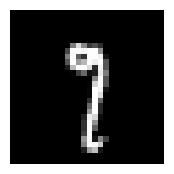

numero 9 classificato come 4


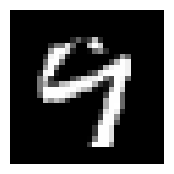

numero 0 classificato come 9


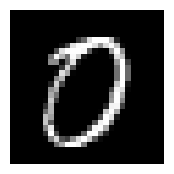

numero 9 classificato come 7


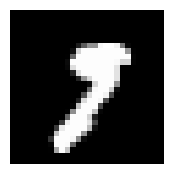

numero 8 classificato come 3


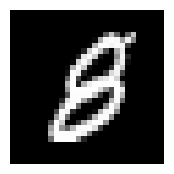

numero 6 classificato come 1


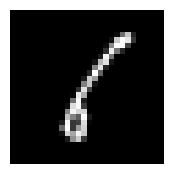

numero 6 classificato come 5


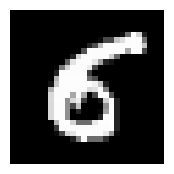

numero 4 classificato come 9


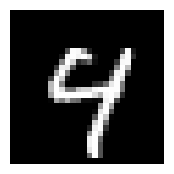

numero 4 classificato come 1


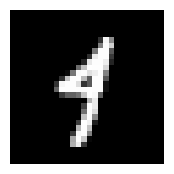

numero 4 classificato come 9


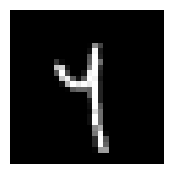

numero 4 classificato come 2


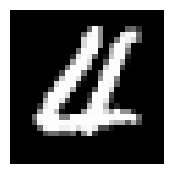

numero 6 classificato come 0


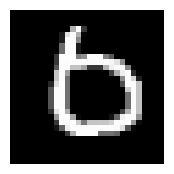

numero 8 classificato come 2


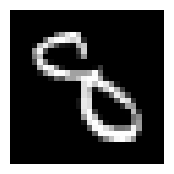

numero 9 classificato come 5


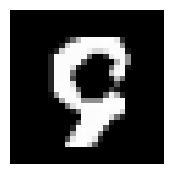

numero 8 classificato come 3


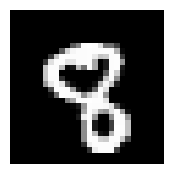

numero 4 classificato come 6


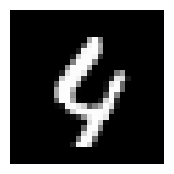

numero 8 classificato come 4


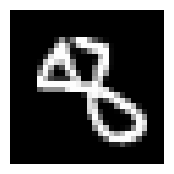

numero 5 classificato come 8


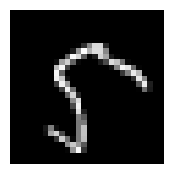

numero 6 classificato come 0


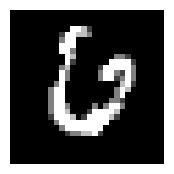

numero 7 classificato come 9


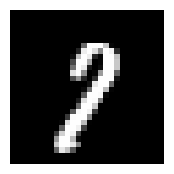

numero 3 classificato come 5


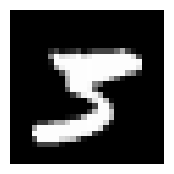

numero 9 classificato come 0


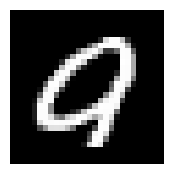

numero 8 classificato come 9


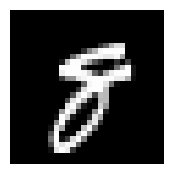

numero 2 classificato come 6


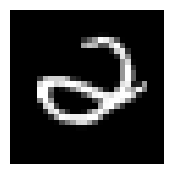

numero 2 classificato come 7


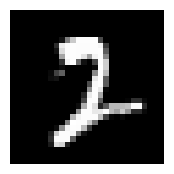

numero 3 classificato come 7


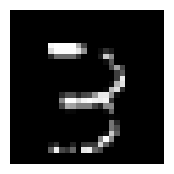

numero 0 classificato come 5


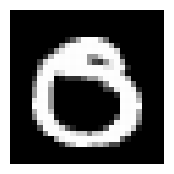

numero 7 classificato come 2


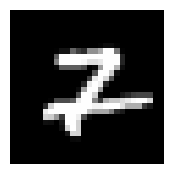

numero 7 classificato come 3


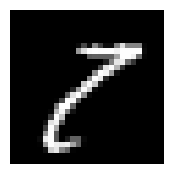

numero 6 classificato come 5


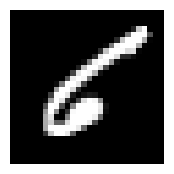

numero 7 classificato come 9


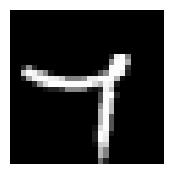

numero 0 classificato come 8


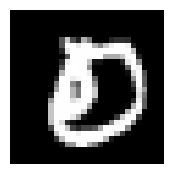

numero 6 classificato come 0


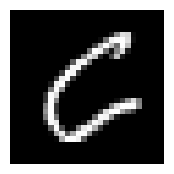

numero 8 classificato come 3


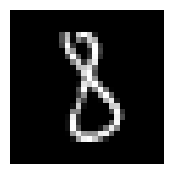

numero 1 classificato come 4


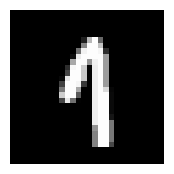

numero 5 classificato come 7


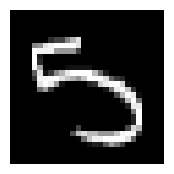

numero 6 classificato come 8


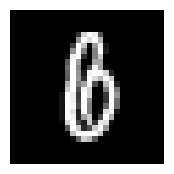

numero 0 classificato come 4


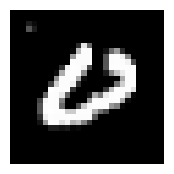

numero 3 classificato come 8


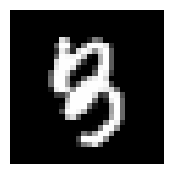

numero 3 classificato come 9


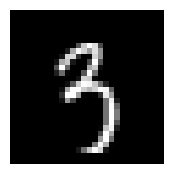

numero 9 classificato come 8


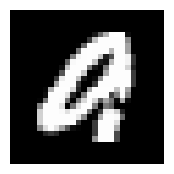

numero 3 classificato come 5


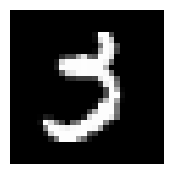

numero 3 classificato come 9


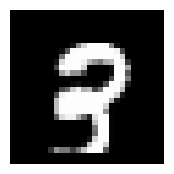

numero 3 classificato come 5


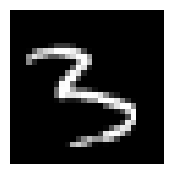

numero 3 classificato come 9


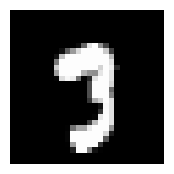

numero 5 classificato come 3


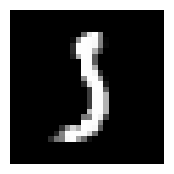

numero 0 classificato come 5


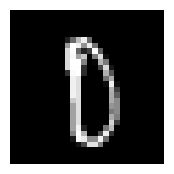

numero 8 classificato come 9


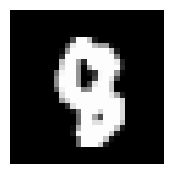

numero 2 classificato come 1


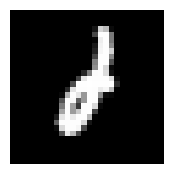

numero 2 classificato come 7


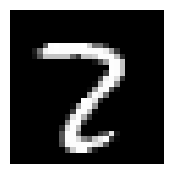

numero 9 classificato come 7


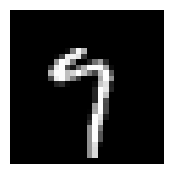

numero 8 classificato come 6


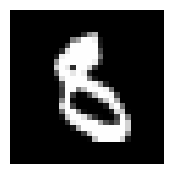

numero 5 classificato come 3


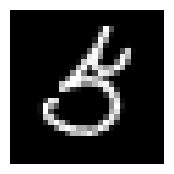

numero 7 classificato come 9


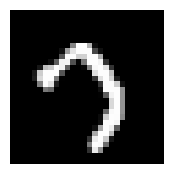

numero 2 classificato come 3


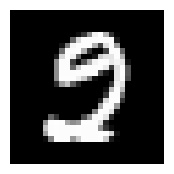

numero 2 classificato come 5


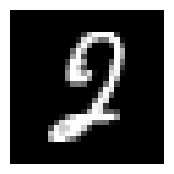

numero 5 classificato come 7


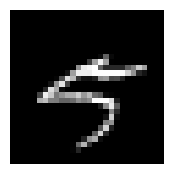

numero 8 classificato come 5


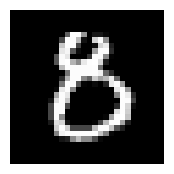

numero 7 classificato come 2


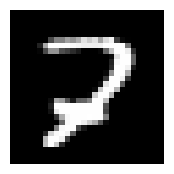

numero 0 classificato come 9


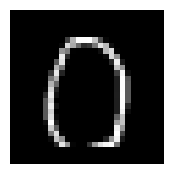

numero 7 classificato come 9


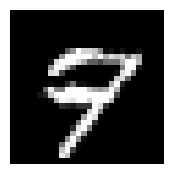

numero 1 classificato come 7


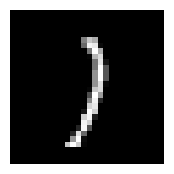

numero 8 classificato come 0


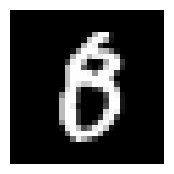

numero 5 classificato come 3


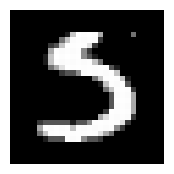

numero 8 classificato come 7


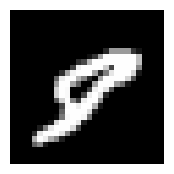

numero 5 classificato come 6


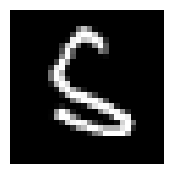

numero 4 classificato come 9


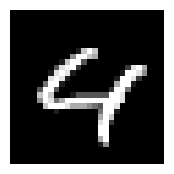

numero 9 classificato come 5


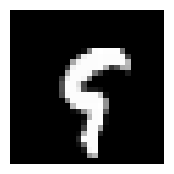

numero 2 classificato come 4


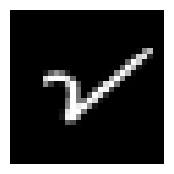

numero 1 classificato come 3


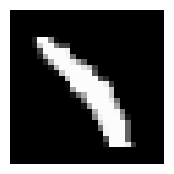

numero 6 classificato come 5


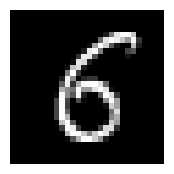

numero 8 classificato come 6


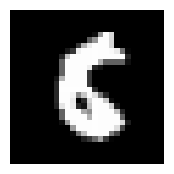

numero 2 classificato come 0


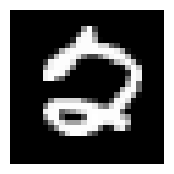

numero 0 classificato come 3


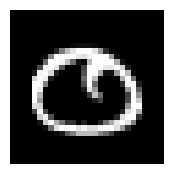

numero 4 classificato come 7


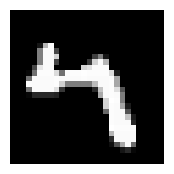

numero 3 classificato come 5


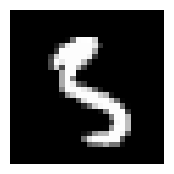

numero 2 classificato come 7


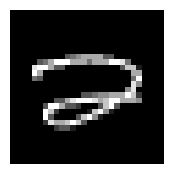

numero 4 classificato come 9


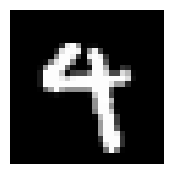

numero 1 classificato come 2


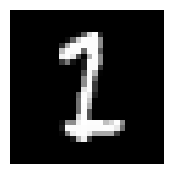

numero 5 classificato come 3


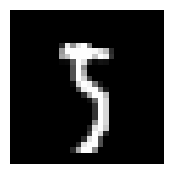

numero 3 classificato come 5


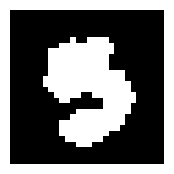

numero 8 classificato come 0


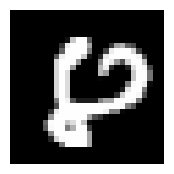

numero 0 classificato come 9


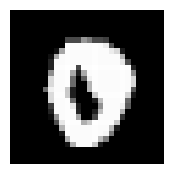

numero 8 classificato come 1


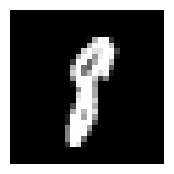

numero 4 classificato come 8


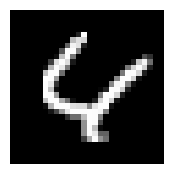

numero 5 classificato come 3


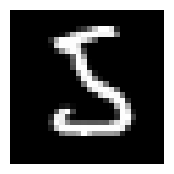

numero 7 classificato come 1


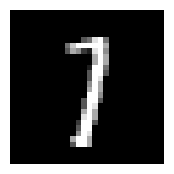

numero 4 classificato come 1


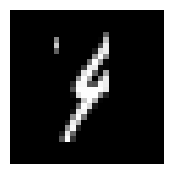

numero 9 classificato come 3


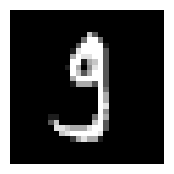

numero 5 classificato come 6


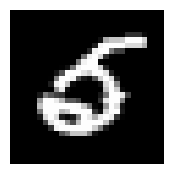

numero 3 classificato come 2


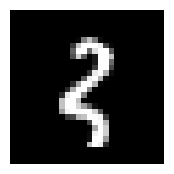

numero 7 classificato come 8


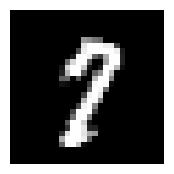

numero 8 classificato come 0


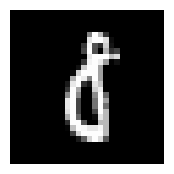

numero 5 classificato come 6


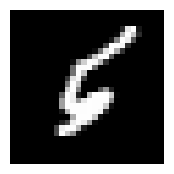

numero 0 classificato come 2


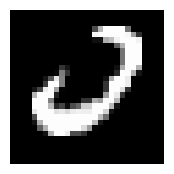

numero 2 classificato come 3


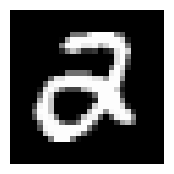

numero 3 classificato come 8


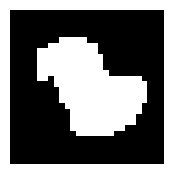

numero 3 classificato come 2


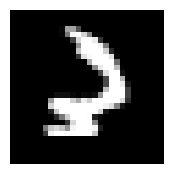

numero 7 classificato come 1


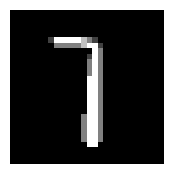

numero 3 classificato come 5


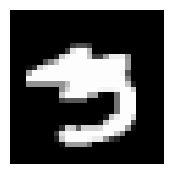

numero 2 classificato come 9


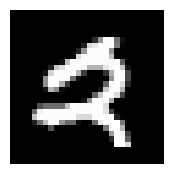

numero 8 classificato come 6


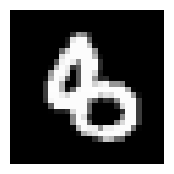

numero 2 classificato come 7


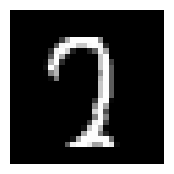

numero 9 classificato come 7


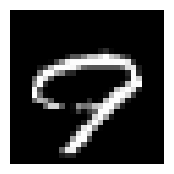

numero 7 classificato come 2


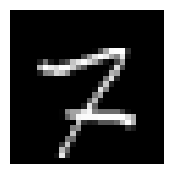

numero 7 classificato come 2


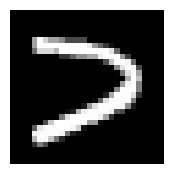

numero 8 classificato come 9


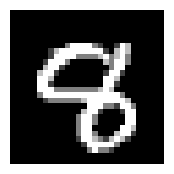

numero 4 classificato come 9


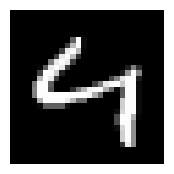

numero 4 classificato come 9


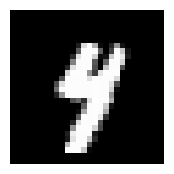

numero 3 classificato come 5


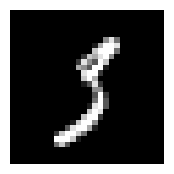

numero 9 classificato come 5


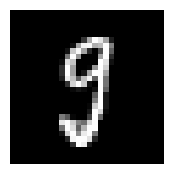

numero 4 classificato come 9


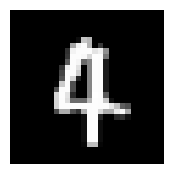

numero 8 classificato come 5


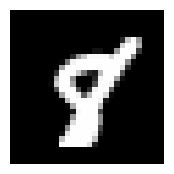

numero 8 classificato come 5


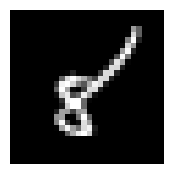

numero 9 classificato come 7


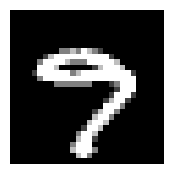

numero 8 classificato come 3


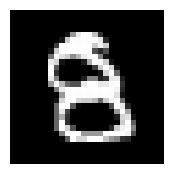

numero 5 classificato come 8


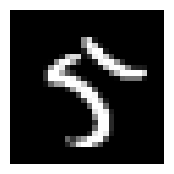

numero 4 classificato come 9


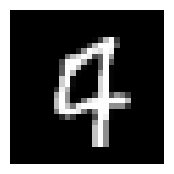

numero 7 classificato come 9


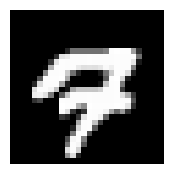

numero 8 classificato come 9


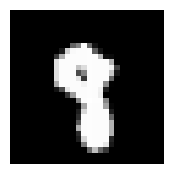

numero 5 classificato come 3


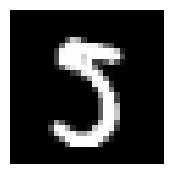

numero 4 classificato come 6


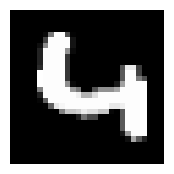

numero 4 classificato come 9


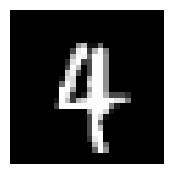

numero 2 classificato come 8


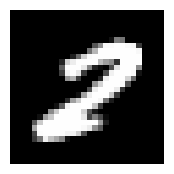

numero 2 classificato come 3


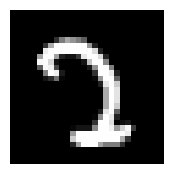

numero 5 classificato come 9


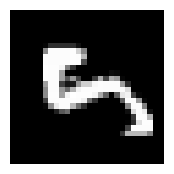

numero 8 classificato come 5


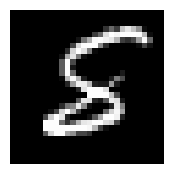

numero 5 classificato come 6


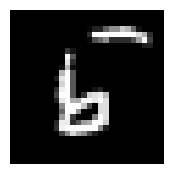

numero 2 classificato come 7


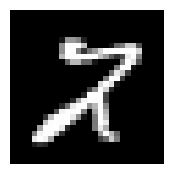

numero 5 classificato come 3


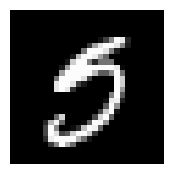

numero 3 classificato come 5


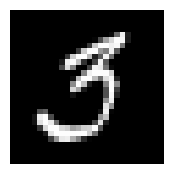

numero 7 classificato come 9


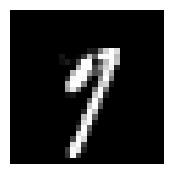

numero 8 classificato come 5


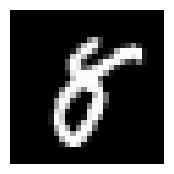

numero 4 classificato come 9


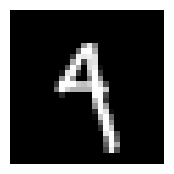

numero 7 classificato come 6


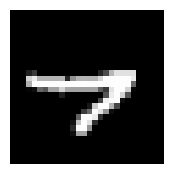

numero 9 classificato come 7


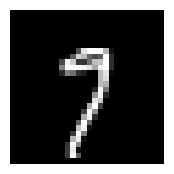

numero 9 classificato come 3


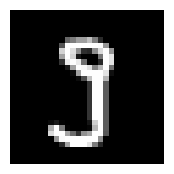

numero 2 classificato come 7


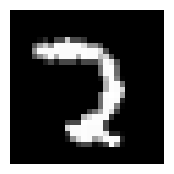

numero 8 classificato come 1


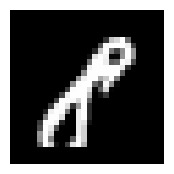

numero 2 classificato come 7


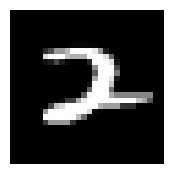

numero 2 classificato come 8


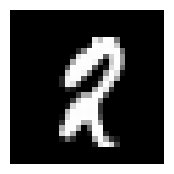

numero 0 classificato come 9


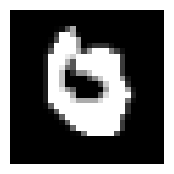

numero 2 classificato come 4


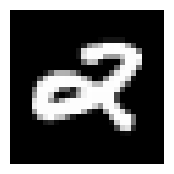

numero 8 classificato come 3


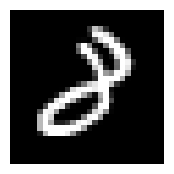

numero 3 classificato come 7


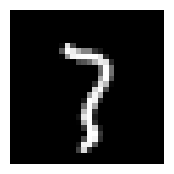

numero 8 classificato come 5


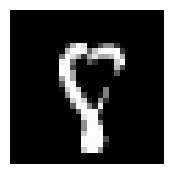

numero 3 classificato come 2


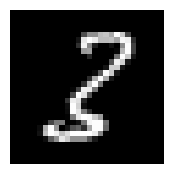

numero 8 classificato come 4


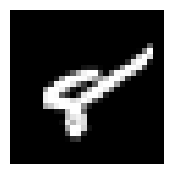

numero 5 classificato come 3


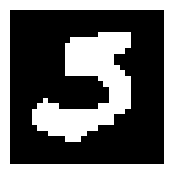

numero 2 classificato come 7


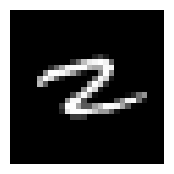

numero 5 classificato come 0


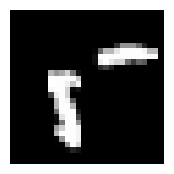

numero 9 classificato come 4


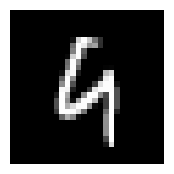

numero 0 classificato come 9


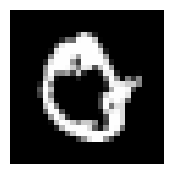

numero 9 classificato come 7


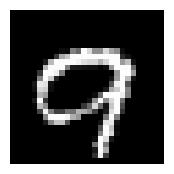

numero 8 classificato come 6


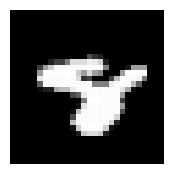

numero 8 classificato come 1


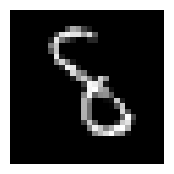

numero 1 classificato come 2


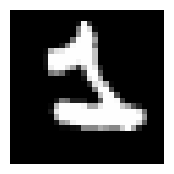

numero 5 classificato come 9


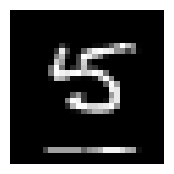

numero 8 classificato come 5


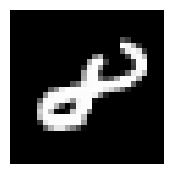

numero 2 classificato come 3


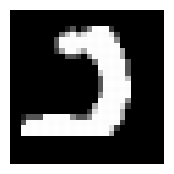

numero 7 classificato come 8


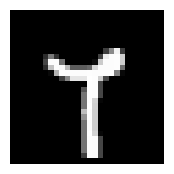

numero 9 classificato come 0


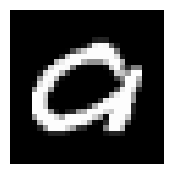

numero 7 classificato come 4


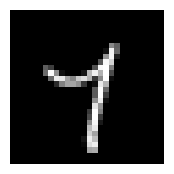

numero 6 classificato come 5


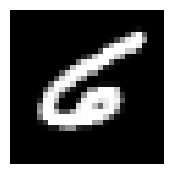

numero 7 classificato come 8


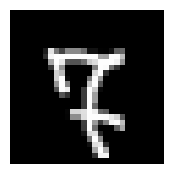

numero 4 classificato come 0


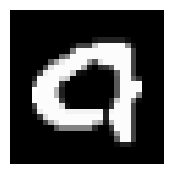

numero 3 classificato come 5


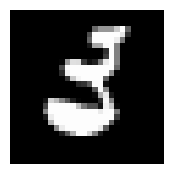

numero 8 classificato come 5


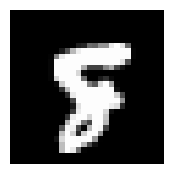

numero 6 classificato come 4


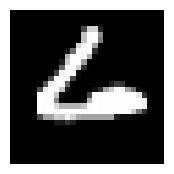

numero 8 classificato come 6


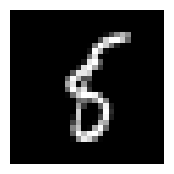

numero 1 classificato come 2


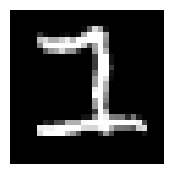

numero 4 classificato come 6


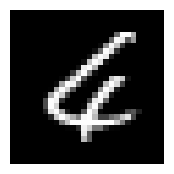

numero 5 classificato come 2


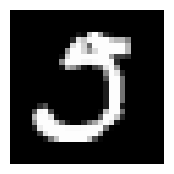

numero 3 classificato come 8


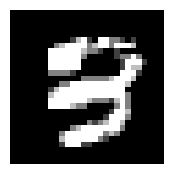

numero 1 classificato come 3


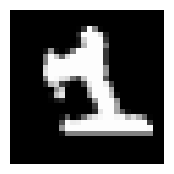

numero 9 classificato come 4


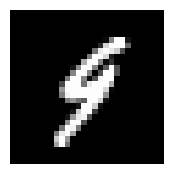

numero 6 classificato come 4


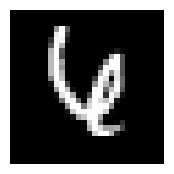

numero 3 classificato come 7


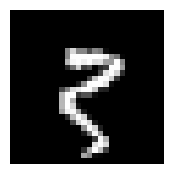

numero 4 classificato come 9


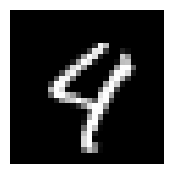

numero 8 classificato come 9


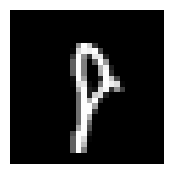

numero 7 classificato come 2


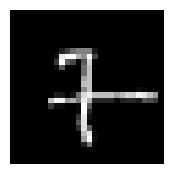

numero 7 classificato come 9


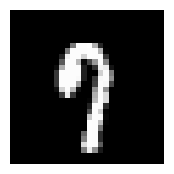

numero 3 classificato come 5


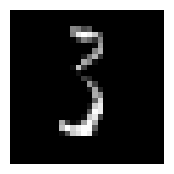

numero 2 classificato come 6


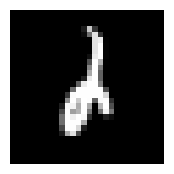

numero 0 classificato come 9


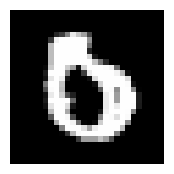

numero 3 classificato come 5


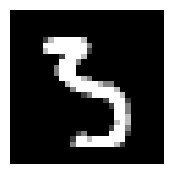

numero 2 classificato come 1


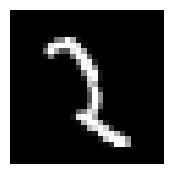

numero 3 classificato come 5


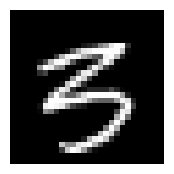

numero 8 classificato come 3


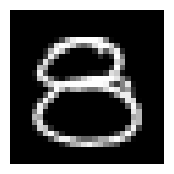

numero 5 classificato come 3


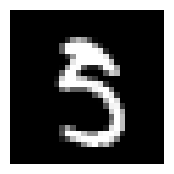

numero 8 classificato come 3


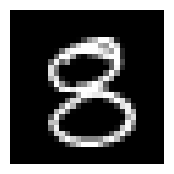

numero 5 classificato come 8


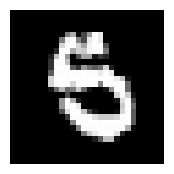

numero 9 classificato come 0


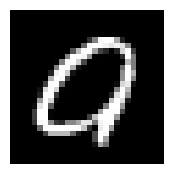

numero 5 classificato come 1


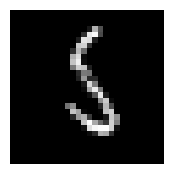

numero 4 classificato come 9


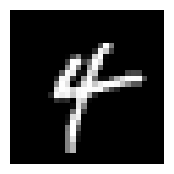

numero 4 classificato come 1


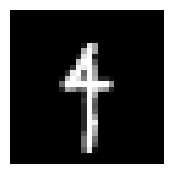

numero 4 classificato come 9


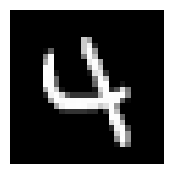

numero 1 classificato come 3


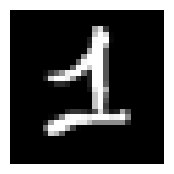

numero 8 classificato come 1


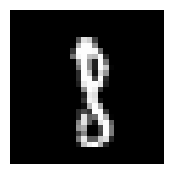

numero 2 classificato come 7


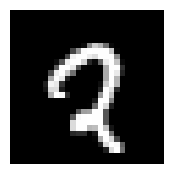

numero 8 classificato come 9


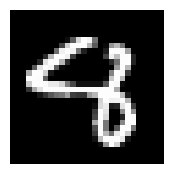

numero 4 classificato come 9


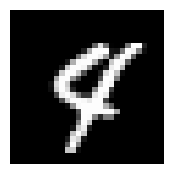

numero 4 classificato come 9


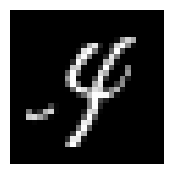

numero 6 classificato come 2


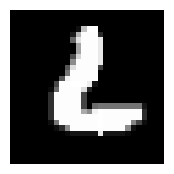

numero 3 classificato come 9


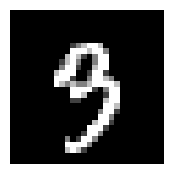

numero 8 classificato come 9


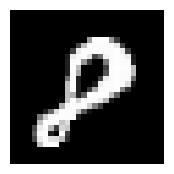

numero 9 classificato come 8


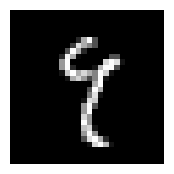

numero 4 classificato come 9


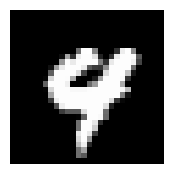

numero 1 classificato come 2


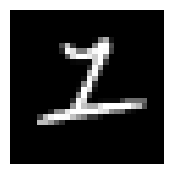

numero 9 classificato come 0


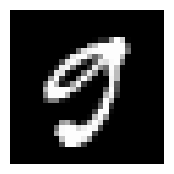

numero 8 classificato come 5


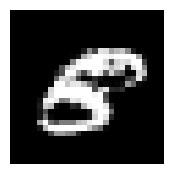

numero 7 classificato come 1


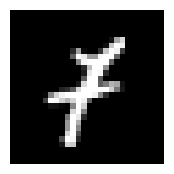

numero 6 classificato come 0


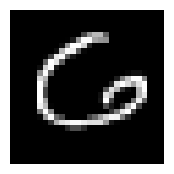

numero 2 classificato come 7


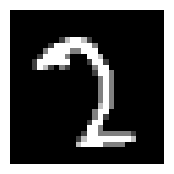

numero 5 classificato come 9


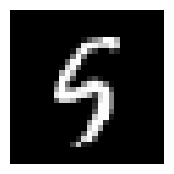

numero 4 classificato come 9


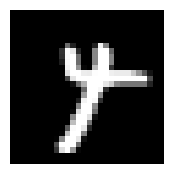

numero 0 classificato come 9


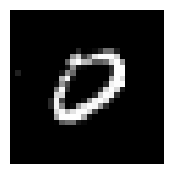

numero 3 classificato come 8


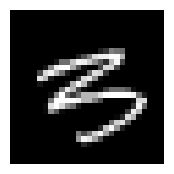

numero 7 classificato come 9


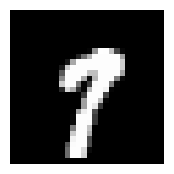

numero 4 classificato come 9


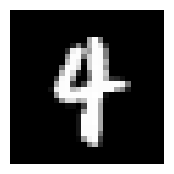

numero 7 classificato come 1


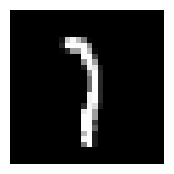

numero 4 classificato come 9


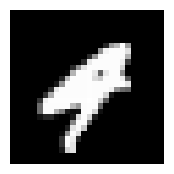

numero 9 classificato come 5


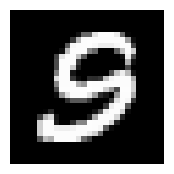

numero 2 classificato come 0


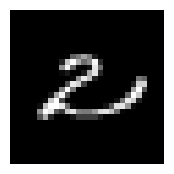

numero 3 classificato come 2


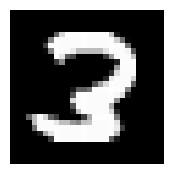

numero 9 classificato come 7


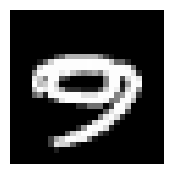

numero 1 classificato come 3


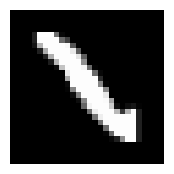

numero 5 classificato come 0


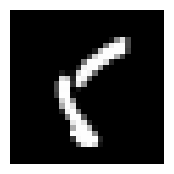

numero 3 classificato come 8


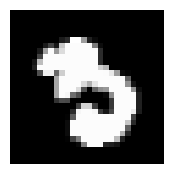

numero 4 classificato come 9


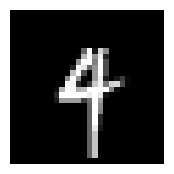

numero 2 classificato come 3


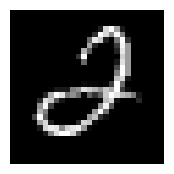

numero 4 classificato come 9


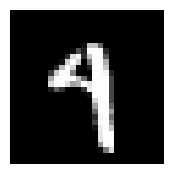

numero 2 classificato come 6


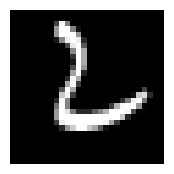

numero 6 classificato come 5


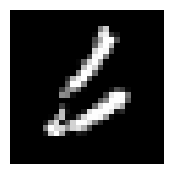

numero 8 classificato come 9


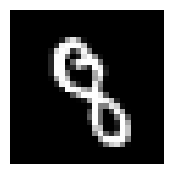

numero 8 classificato come 7


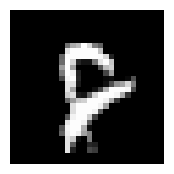

numero 8 classificato come 9


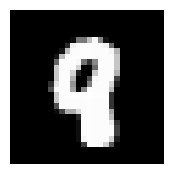

numero 2 classificato come 6


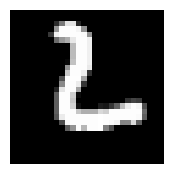

numero 2 classificato come 3


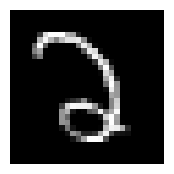

numero 5 classificato come 4


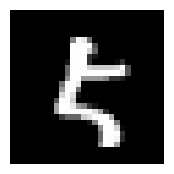

numero 3 classificato come 8


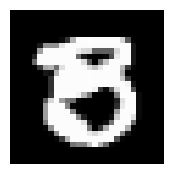

numero 7 classificato come 1


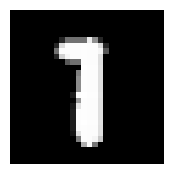

numero 3 classificato come 9


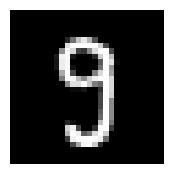

numero 2 classificato come 1


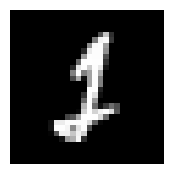

numero 2 classificato come 9


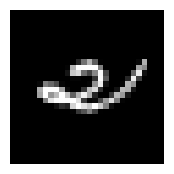

numero 8 classificato come 2


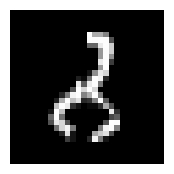

numero 8 classificato come 3


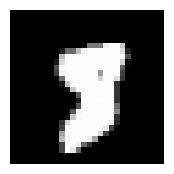

numero 4 classificato come 1


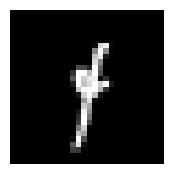

numero 2 classificato come 0


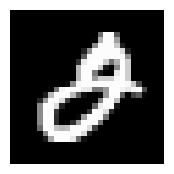

numero 8 classificato come 3


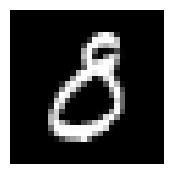

numero 8 classificato come 9


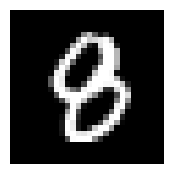

numero 5 classificato come 0


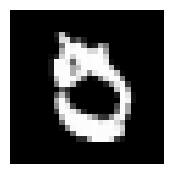

numero 1 classificato come 9


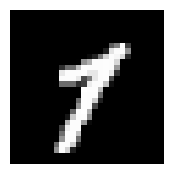

numero 4 classificato come 9


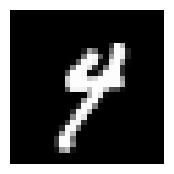

numero 8 classificato come 9


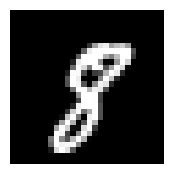

numero 5 classificato come 9


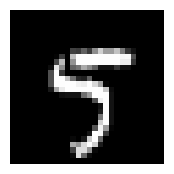

numero 2 classificato come 7


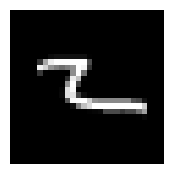

numero 1 classificato come 3


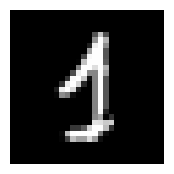

numero 3 classificato come 5


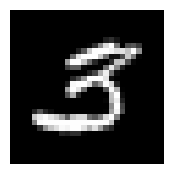

numero 5 classificato come 3


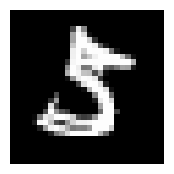

numero 8 classificato come 2


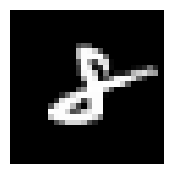

numero 0 classificato come 4


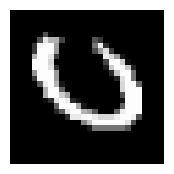

numero 3 classificato come 5


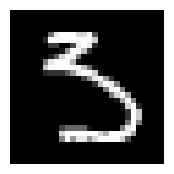

numero 9 classificato come 4


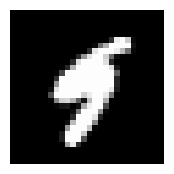

numero 9 classificato come 8


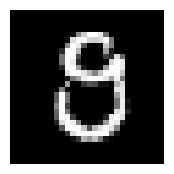

numero 4 classificato come 9


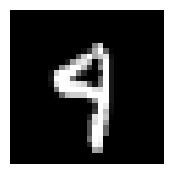

numero 5 classificato come 0


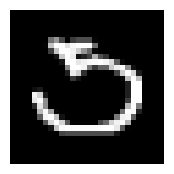

numero 3 classificato come 5


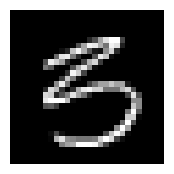

numero 3 classificato come 9


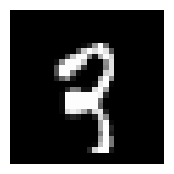

numero 4 classificato come 9


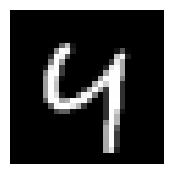

numero 9 classificato come 8


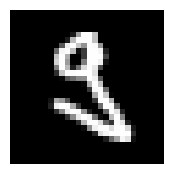

numero 7 classificato come 4


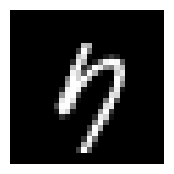

numero 1 classificato come 9


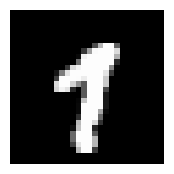

numero 5 classificato come 0


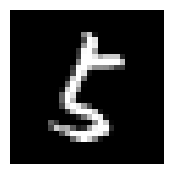

numero 2 classificato come 4


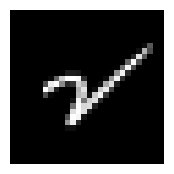

numero 8 classificato come 3


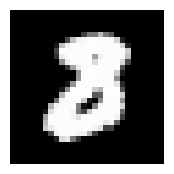

numero 2 classificato come 6


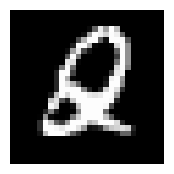

numero 0 classificato come 5


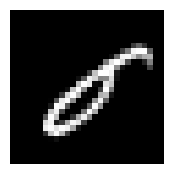

numero 6 classificato come 5


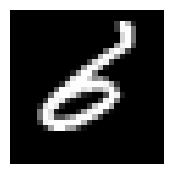

numero 6 classificato come 1


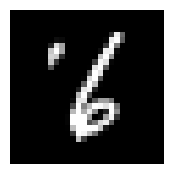

numero 9 classificato come 0


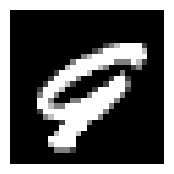

numero 5 classificato come 3


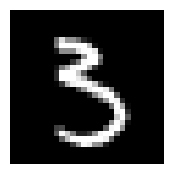

numero 4 classificato come 9


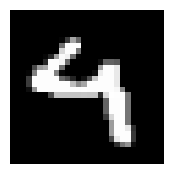

numero 1 classificato come 4


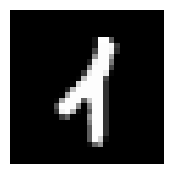

numero 8 classificato come 1


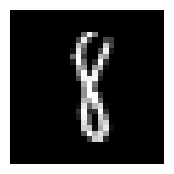

numero 2 classificato come 4


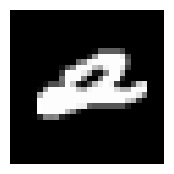

numero 4 classificato come 6


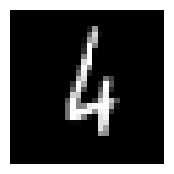

numero 0 classificato come 8


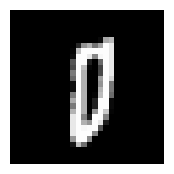

numero 7 classificato come 9


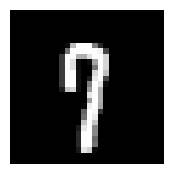

numero 2 classificato come 7


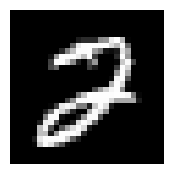

numero 7 classificato come 9


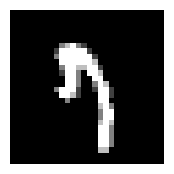

numero 3 classificato come 5


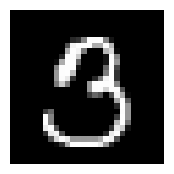

numero 9 classificato come 1


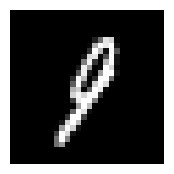

numero 2 classificato come 6


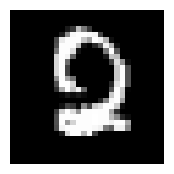

numero 8 classificato come 9


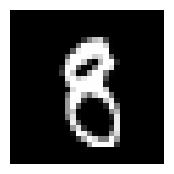

numero 7 classificato come 2


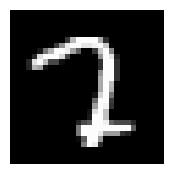

numero 4 classificato come 9


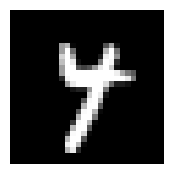

numero 9 classificato come 3


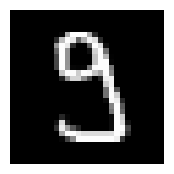

numero 2 classificato come 7


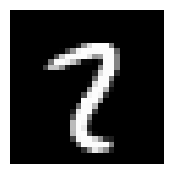

numero 6 classificato come 5


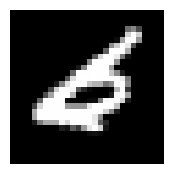

numero 2 classificato come 0


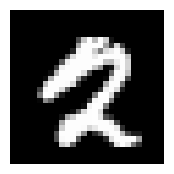

numero 2 classificato come 7


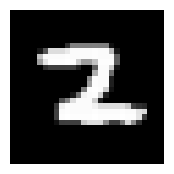

numero 5 classificato come 9


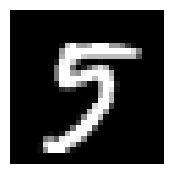

numero 3 classificato come 5


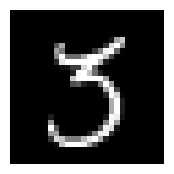

numero 2 classificato come 8


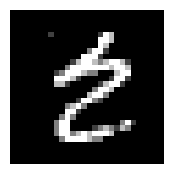

numero 2 classificato come 1


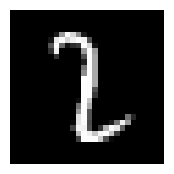

numero 0 classificato come 7


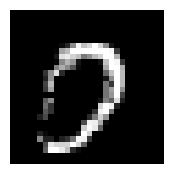

numero 8 classificato come 1


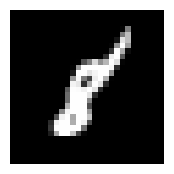

numero 9 classificato come 4


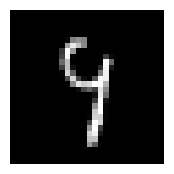

numero 9 classificato come 7


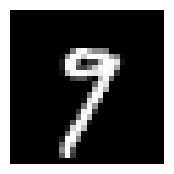

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(4,4))
for i in range(len(X_test)):
    if (y_test[i] != y_pred_classes[i]):
        print("numero %d classificato come %d" % (y_test[i], y_pred_classes[i]))
        plt.figure(figsize=(2,2))
        plt.imshow(X_test[i].reshape([28,28]), cmap='gray')
        plt.axis('off')
        plt.show()

 # Fashion-MNIST

In [5]:
(X_train2,y_train2),(X_test2, y_test2) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Dato che una singola osservazione è una matrice, dobbiamo spacchettare le righe all'interno di un singolo vettore. Per farlo possiamo utilizzare il metodo reshape.

In [6]:
X_train2 = X_train2.reshape(X_train2.shape[0], 28*28)
X_test2 = X_test2.reshape(X_test2.shape[0], 28*28)
X_train2 = X_train2/255
X_test2 = X_test2/255

Passiamo agli array con i target, questi contengono un valore numerico che va da 0 a 9, il quale rappresenta la categoria di appartenenza dell'articolo raffigurato nell'immagine, tra quelle elencate sopra.
Per poter eseguire una classificazione multiclasse dobbiamo creare 10 variabili dummy per ogni osservazione, una per ogni classe. Possiamo farlo utilizzando la funzione to_categorical di Keras.

In [7]:
# Importiamo il nome di ogni classe all'interno di un array chiamato labels, classi che vanno da 0 a 9 (10 in totale)
labels = ["T-shirt/top","Pantalone","Pullover","Vestito","Cappotto","Sandalo","Maglietta","Sneaker","Borsa","Stivaletto"]

y_train_dummy2 = to_categorical(y_train2, 10)
y_test_dummy2 = to_categorical(y_test2, 10)

## Full batch Gradient Descent

Cominciamo dal Full batch Gradient Descent. Per prima cosa creiamo il modello, possiamo utilizzare la stessa architettura che abbiamo utilizzato in un notebook precedente per il MNIST.

In [ ]:
model = build_model()
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Adesso, per utilizzare il full batch gradient descent, non dobbiamo far altro che specificare all'interno del metodo fit che la dimensione di un batch deve essere pari al numero di osservazioni nel set di addestramento, in tal modo l'algoritmo di ottimizzazione utilizzerà un unico batch con tutte le osservazioni ad ogni iterazione del gradient descent.
Per poter costruire un grafico della funzione di costo ad ogni epoca dobbiamo tener traccia di questi valori, per farlo dobbiamo definire un callback.

Tempo di addestramento: 0 minuti e 20 secondi
Accuracy = 0.7057 - Loss = 0.9204


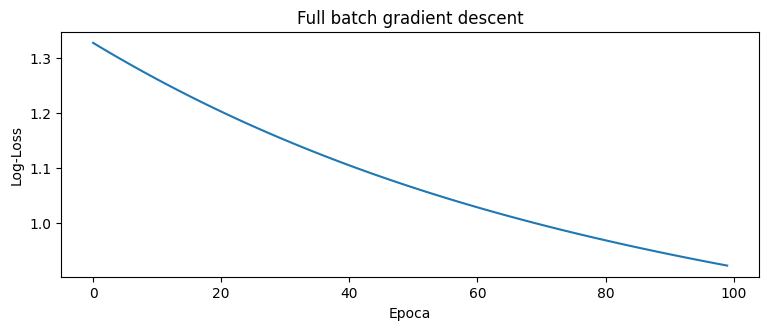

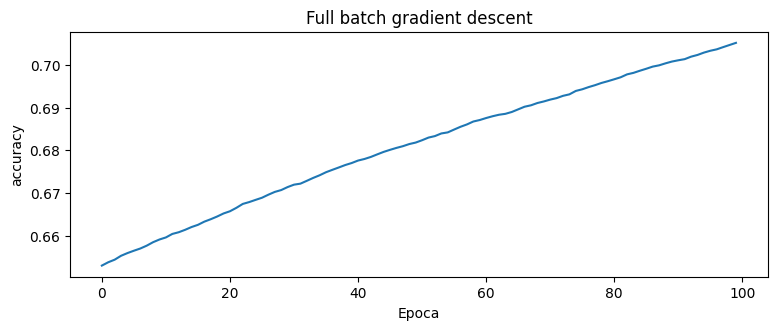

In [ ]:
model = train_and_time(model,"Full batch gradient descent", X_train2.shape[0],100)

Notiamo come le prestazzioni del modello non arrivano mai a valori abbastanzi elevati e che la convergenza del full batch gradient descent sia molto lenta. Però è anche vero che la loss del modello si sia ridotta in maniera abbastanza pulita senza oscillazzioni al semplice aumentare delle epoche effettuate.

In [ ]:
model.evaluate(X_test2, y_test_dummy2)

313/313 [==============================] - 1s 2ms/step - loss: 0.9372 - accuracy: 0.6924


[0.9371657371520996, 0.6923999786376953]

## Stochastic Gradient Descent


In [44]:
model2 = build_model()
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               401920    
                                                                 
 dense_41 (Dense)            (None, 256)               131328    
                                                                 
 dense_42 (Dense)            (None, 128)               32896     
                                                                 
 dense_43 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Adesso, per utilizzare lo Stochastic Gradient Descent, impostiamo come dimensione del singolo batch 1, in modo tale da far utilizzare all'algoritmo di ottimizzazione un esempio per volta. Facendo questo il gradient descent ad ogni epoca viene eseguito un numero di volte pari al numero di esempi nel set di addestramento (nel nostro caso 60.000), ne segue che il completamento di un'epoca richiederà molto più tempo rispetto al full batch. Per questo motivo impostiamo il numero di epoche a 5.


Tempo di addestramento: 11 minuti e 43 secondi
Accuracy = 0.8834 - Loss = 0.3053


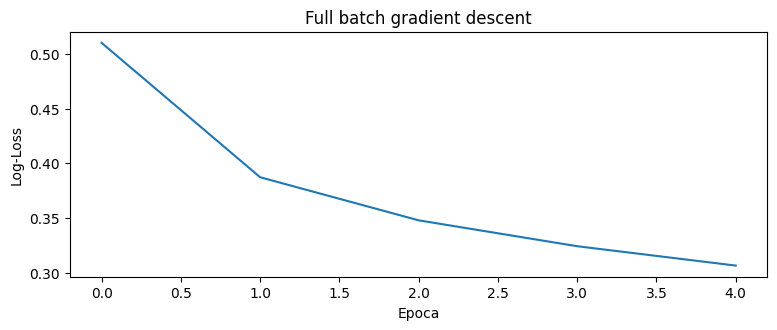

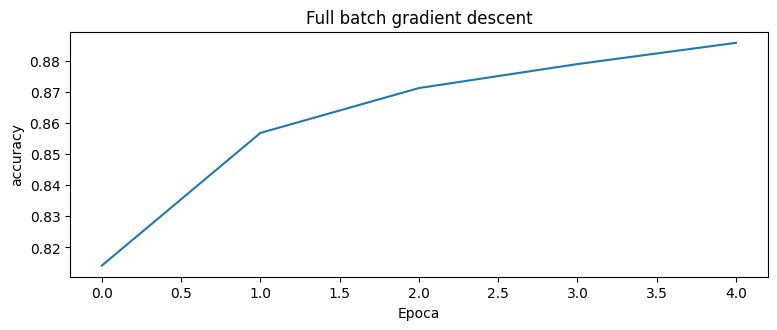

In [45]:
model2 = train_and_time(model2,"Full batch gradient descent", 1, 5)

Abbiamo ottenuto prestazioni nettamente migliori a discapito però del tempo di addestramento, che ha richiesto svariati minuti


In [46]:
model2.evaluate(X_test2, y_test_dummy2)

313/313 [==============================] - 1s 3ms/step - loss: 0.3750 - accuracy: 0.8609


[0.37495937943458557, 0.8608999848365784]

## Mini Batch Gradient Descent


In [47]:
model3 = build_model()
model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               401920    
                                                                 
 dense_45 (Dense)            (None, 256)               131328    
                                                                 
 dense_46 (Dense)            (None, 128)               32896     
                                                                 
 dense_47 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


E adesso specifichiamo all'interno del metodo fit la dimensione di ogni batch, i valori consigliati sono 32, 64, 128, 256 e 512.
Optiamo per 512.

Tempo di addestramento: 5 minuti e 1 secondi
Accuracy = 0.8908 - Loss = 0.3058


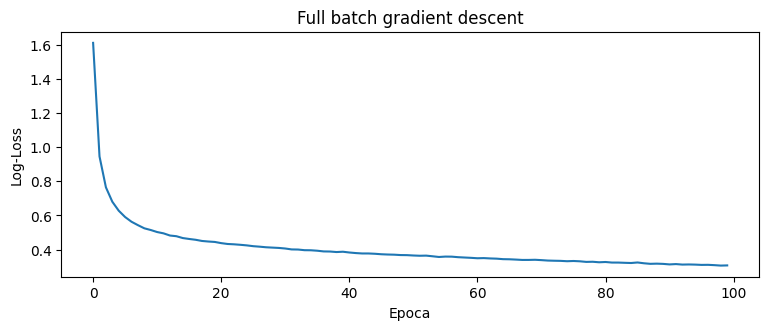

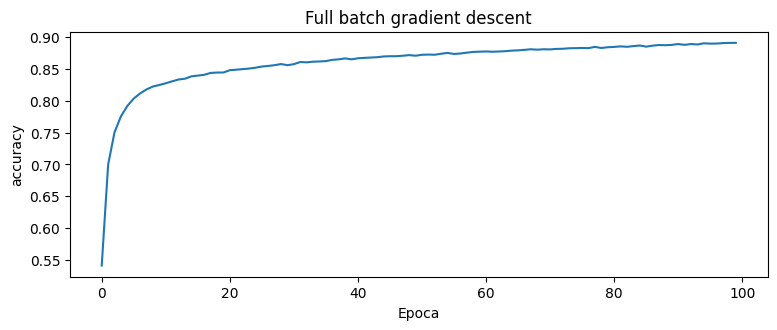

In [48]:
model3 = train_and_time(model3,"Full batch gradient descent", 512, 100)

Come si può notare l'errore si è ridotto molto in fretta durante le prime 10 epoche, dopodichè ha continuato a migliorare più lentamento oscillando però in manierà molto vistosa.

In [49]:
model3.evaluate(X_test2, y_test_dummy2)

313/313 [==============================] - 1s 4ms/step - loss: 0.3701 - accuracy: 0.8663


[0.3701430559158325, 0.8662999868392944]

## Momentum

In [23]:
model4 = build_model()
sgd = optimizers.SGD(momentum=0.9)
model4.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Tempo di addestramento: 5 minuti e 22 secondi
Accuracy = 0.9759 - Loss = 0.0658


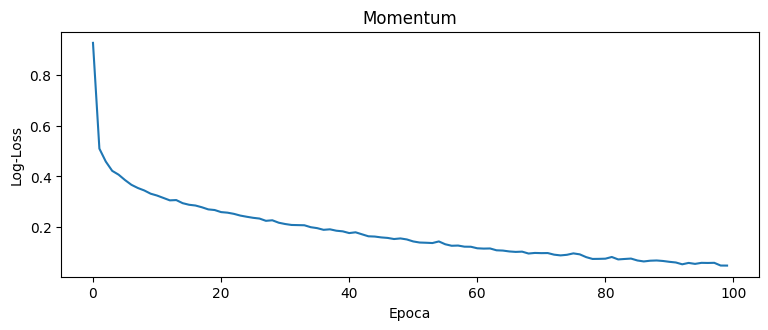

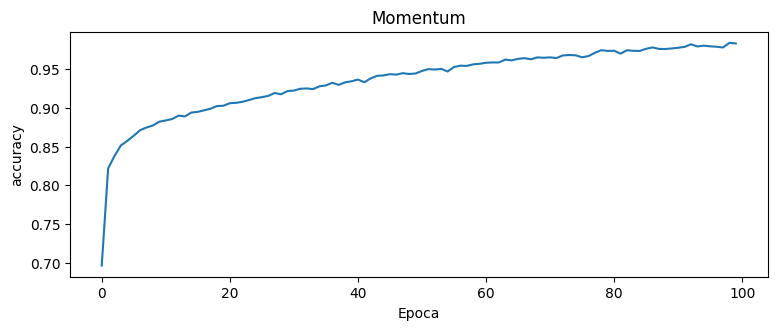

In [24]:
model4 = train_and_time(model4,"Momentum", 512, 100)

In [25]:
model4.evaluate(X_test2, y_test_dummy2)

313/313 [==============================] - 1s 2ms/step - loss: 0.4598 - accuracy: 0.8890


[0.4598393440246582, 0.8889999985694885]

## Nesterov momentum

In [26]:
model5 = build_model()
sgd = optimizers.SGD(momentum=0.9, nesterov = True)
model5.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Tempo di addestramento: 5 minuti e 10 secondi
Accuracy = 0.9915 - Loss = 0.0309


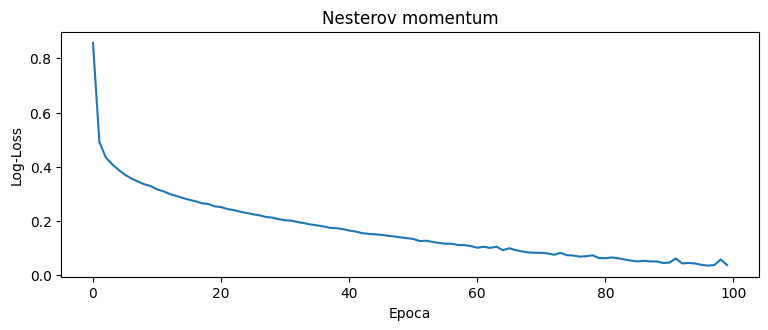

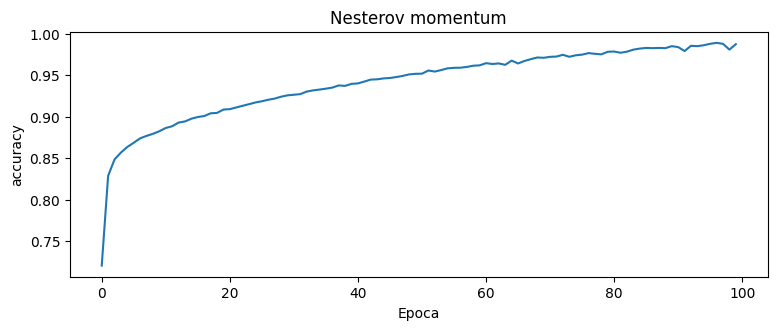

In [27]:
model5 = train_and_time(model5, "Nesterov momentum", 512, 100)

In [28]:
model5.evaluate(X_test2, y_test_dummy2)

313/313 [==============================] - 1s 2ms/step - loss: 0.4741 - accuracy: 0.8909


[0.4740949273109436, 0.8909000158309937]

## OTTIMIZZATORI CON LEARNING-RATE ADATTIVO

## Adagrad

In [29]:
model6 = build_model()
adagrad = optimizers.Adagrad()
model6.compile(loss='categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Tempo di addestramento: 5 minuti e 1 secondi
Accuracy = 0.8614 - Loss = 0.4063


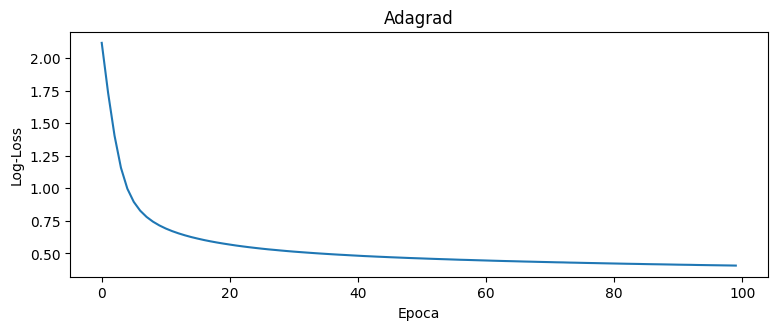

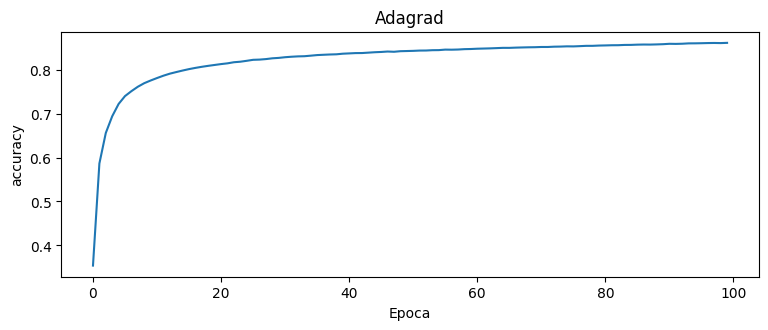

In [30]:
model6 = train_and_time(model6, "Adagrad", 512, 100)

In [31]:
model6.evaluate(X_test2, y_test_dummy2)

313/313 [==============================] - 1s 4ms/step - loss: 0.4430 - accuracy: 0.8466


[0.4430042505264282, 0.8465999960899353]

## RMSprop

In [32]:
model7 = build_model()
RMSprop = optimizers.RMSprop()
model7.compile(loss='categorical_crossentropy', optimizer=RMSprop, metrics=['accuracy'])
model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Tempo di addestramento: 5 minuti e 23 secondi
Accuracy = 0.9869 - Loss = 0.0406


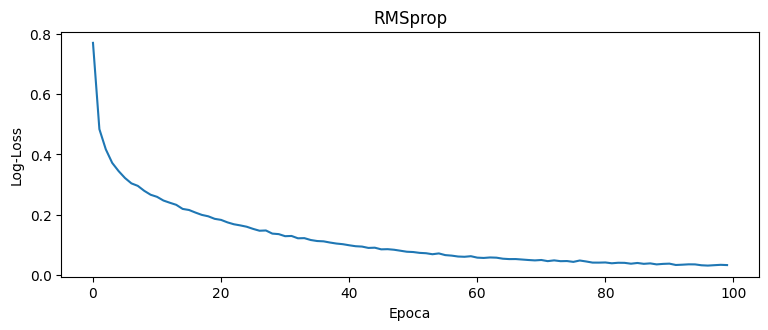

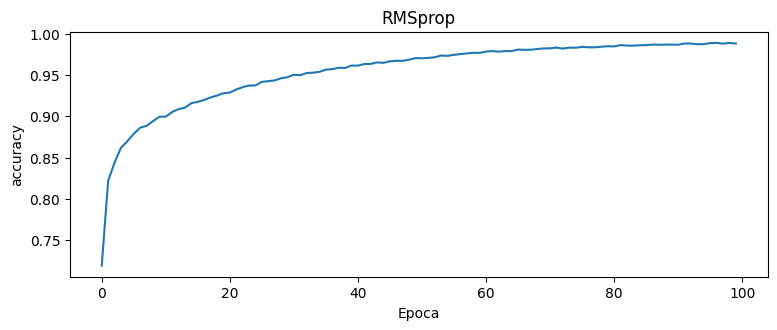

In [33]:
model7 = train_and_time(model7, "RMSprop", 512, 100)

In [34]:
model7.evaluate(X_test2, y_test_dummy2)

313/313 [==============================] - 1s 4ms/step - loss: 0.9947 - accuracy: 0.8939


[0.9946874976158142, 0.8938999772071838]

## Adam

In [35]:
model8 = build_model()
adam = optimizers.Adam()
model8.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 512)               401920    
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 dense_31 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Tempo di addestramento: 5 minuti e 23 secondi
Accuracy = 0.9832 - Loss = 0.0451


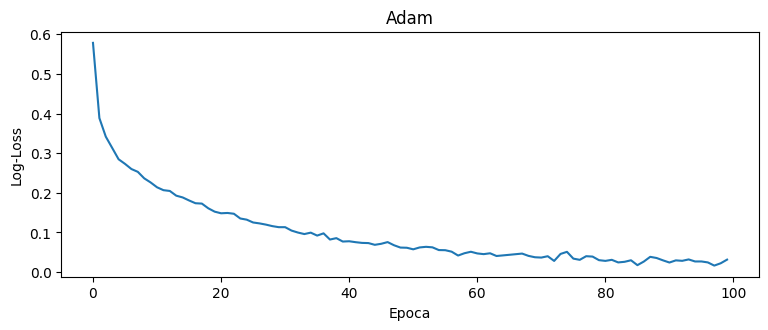

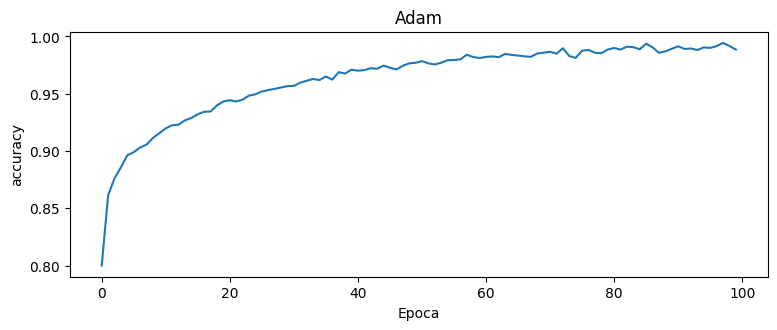

In [36]:
model8 = train_and_time(model8, "Adam", 512, 100)

In [37]:
model8.evaluate(X_test2, y_test_dummy2)

313/313 [==============================] - 1s 2ms/step - loss: 0.7302 - accuracy: 0.8881


[0.7302387952804565, 0.8881000280380249]

## Nadam

In [41]:
model9 = build_model()
Nadam = optimizers.Nadam()
model9.compile(loss='categorical_crossentropy', optimizer=Nadam, metrics=['accuracy'])
model9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 512)               401920    
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                                 
 dense_39 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Tempo di addestramento: 5 minuti e 46 secondi
Accuracy = 0.9927 - Loss = 0.0212


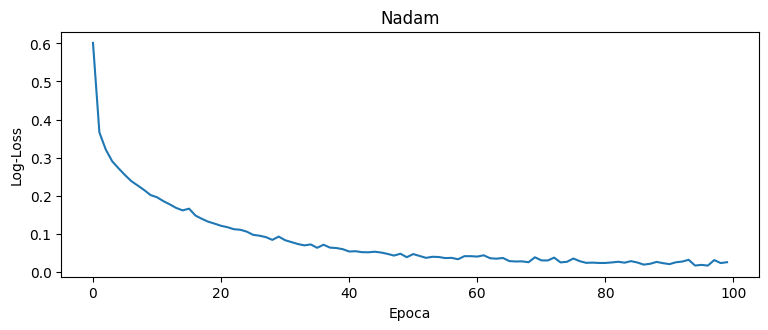

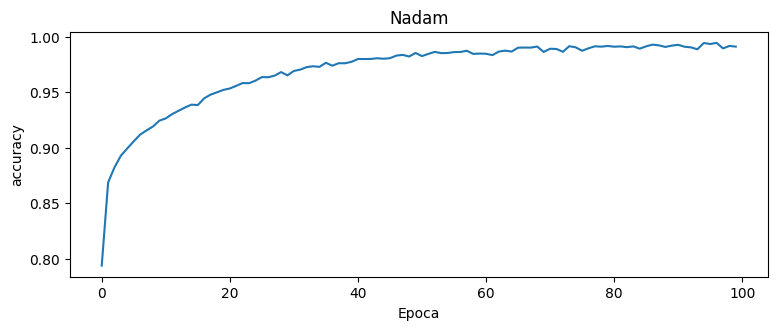

In [42]:
model9 = train_and_time(model9, "Nadam", 512, 100)

In [43]:
model9.evaluate(X_test2, y_test_dummy2)

313/313 [==============================] - 2s 5ms/step - loss: 0.8244 - accuracy: 0.8929


[0.824364423751831, 0.8928999900817871]